In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [5]:
import parent
import torch.nn.functional as F
from mermaidlite import compute_warped_image_multiNC, identity_map_multiN
import torch
import random
import inverseConsistentNet
import networks
import data
import matplotlib.pyplot as plt
import numpy as np

In [6]:
_, medresknees = data.get_knees_dataset()

In [8]:

BATCH_SIZE = 24
SCALE = 1  # 1 IS QUARTER RES, 2 IS HALF RES, 4 IS FULL RES
working_shape = [BATCH_SIZE, 1, 40 * SCALE, 96 * SCALE, 96 * SCALE]

net = inverseConsistentNet.InverseConsistentAffineDeformableNet(
    networks.ConvolutionalMatrixNet(dimension=3),
    networks.tallUNet2(dimension=3),
    lmbda=100,
    input_shape=working_shape,
)

net.load_state_dict(torch.load("../results/aff_aff_def_knee_frozen_affine/knee_aligner_resi_net12000"))

/playpen-raid1/tgreer/InverseConsistency/networks.py:390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([[2, 16, 32, 64, 256, 512], [16, 32, 64, 128, 256]]),


<All keys matched successfully>

In [9]:
net.cuda()

InverseConsistentAffineDeformableNet(
  (affine_regis_net): ConvolutionalMatrixNet(
    (convs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (2): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (5): Conv3d(256, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (dense2): Linear(in_features=512, out_features=300, bias=True)
    (dense3): Linear(in_features=300, out_features=12, bias=True)
  )
  (regis_net): UNet2(
    (downConvs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      

In [6]:
def make_batch():
    image = torch.cat([random.choice(medresknees) for _ in range(BATCH_SIZE)])
    image = image[:, None]
    image = image.cuda()
    return image

In [7]:
moving_image, fixed_image = make_batch(), make_batch()

In [8]:
net(moving_image, fixed_image)

[tensor(0.0205, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(0.0020, device='cuda:0', grad_fn=<MulBackward0>),
 tensor(0.0185, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(0.3147, device='cuda:0', grad_fn=<MulBackward0>)]

In [175]:
import matplotlib.pyplot as plt

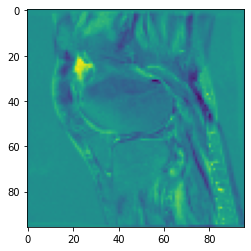

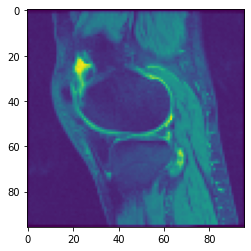

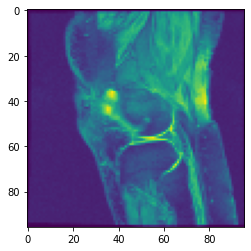

In [276]:
N += 1
plt.imshow(fixed_image[N, 0, 10].cpu() - net.warped_image_A[N, 0, 10].cpu().detach())
plt.show()
plt.imshow(fixed_image[N, 0, 10].cpu().detach())
plt.show()
plt.imshow(moving_image[N, 0, 10].cpu().detach())

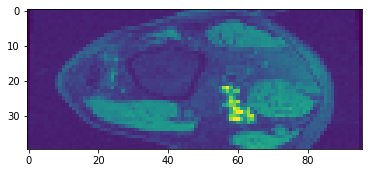

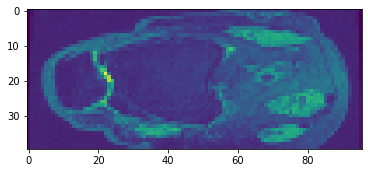

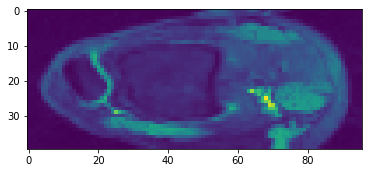

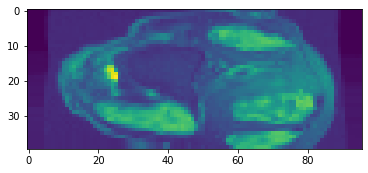

In [177]:
import matplotlib.pyplot as plt
N = 20
plt.imshow(moving_image[N, 0, :, 20].cpu())
plt.show()
plt.imshow(fixed_image[N, 0, :, 20].cpu())
plt.show()
plt.imshow(net.warped_image_A[N, 0, :, 20].cpu().detach())
plt.show()
plt.imshow(net.warped_image_B[N, 0, :, 20].cpu().detach())

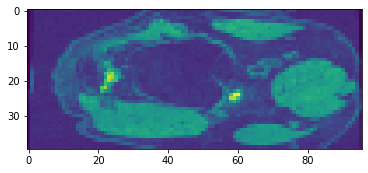

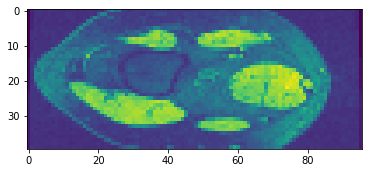

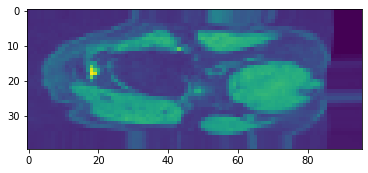

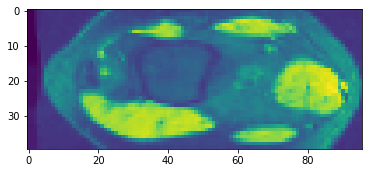

In [178]:
import matplotlib.pyplot as plt
plt.imshow(moving_image[0, 0, :, 10].cpu())
plt.show()
plt.imshow(fixed_image[0, 0, :, 10].cpu())
plt.show()
plt.imshow(net.warped_image_A[0, 0, :, 10].cpu().detach())
plt.show()
plt.imshow(net.warped_image_B[0, 0, :, 10].cpu().detach())

In [179]:
net.matrix_AB[22].cpu().detach().numpy()

array([[ 0.8921268 ,  0.01366304, -0.02698795, -0.00230147],
       [-0.02714648,  0.8886366 ,  0.04763453, -0.02069031],
       [-0.02109941, -0.01767839,  0.9114483 ,  0.10829491],
       [ 0.        ,  0.        ,  0.        ,  1.        ]],
      dtype=float32)

In [180]:
import numpy as np
np.set_printoptions(suppress=True)

In [181]:
len(list(net.parameters()))

48

In [182]:
next(net.parameters()).requires_grad

True

In [183]:
len(list(net.affine_regis_net.parameters()))

16

In [184]:
import visualize

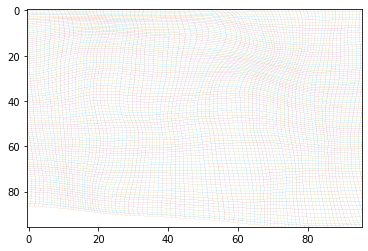

In [185]:
visualize.show_as_grid(net.phi_BA[20, [1, 2], 20])

In [186]:
net.phi_AB.shape

torch.Size([24, 4, 40, 96, 96])

In [11]:
import pickle
with open("/playpen/tgreer/cartilage_uint8s.trch", "rb") as f:
    cartilage = torch.load(f)

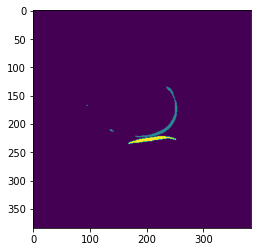

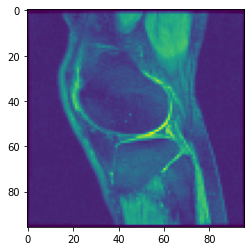

In [12]:
N = 1
plt.imshow(cartilage[N][0, 40])
plt.show()
plt.imshow(medresknees[N][0, 10])



In [15]:
net.adjust_batch_size(BATCH_SIZE // 8)
net.cuda()

InverseConsistentAffineDeformableNet(
  (affine_regis_net): ConvolutionalMatrixNet(
    (convs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (2): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (4): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (5): Conv3d(256, 512, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (dense2): Linear(in_features=512, out_features=300, bias=True)
    (dense3): Linear(in_features=300, out_features=12, bias=True)
  )
  (regis_net): UNet2(
    (downConvs): ModuleList(
      (0): Conv3d(2, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      (1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
      

In [13]:
def make_test_batch():
    index = [random.randint(0, 240 - 1) for _ in range(BATCH_SIZE// 8)]
    image = torch.cat([medresknees[index[_]] for _ in range(BATCH_SIZE // 8)])
    image = image.reshape(BATCH_SIZE // 8, 1, 40 * SCALE, 96 * SCALE, 96 * SCALE)
    image = image.cuda()
    #print(image.shape)
    cartilage_batch = torch.cat([cartilage[index[_]][None, :, :, :, :] for _ in range(BATCH_SIZE // 8)])
    #cartilage_batch = cartilage_batch[:, None, :]
    #print(cartilage_batch.shape)
    cartilage_batch = cartilage_batch.cuda()
    return image, cartilage_batch

fixed_image, fixed_cartilage = make_test_batch()
moving_image, moving_cartilage = make_test_batch()


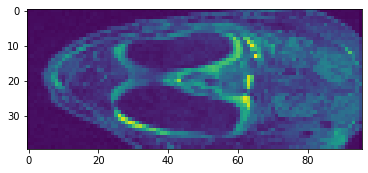

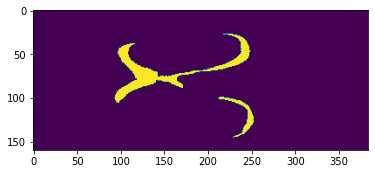

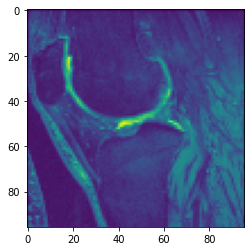

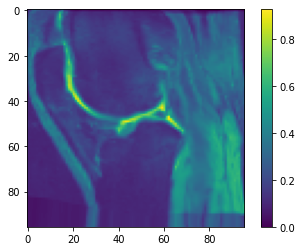

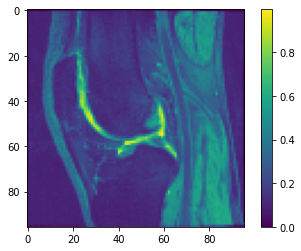

In [16]:
net(moving_image, fixed_image)

N =1
S =46
plt.imshow(moving_image[N, 0, :, S].cpu())
plt.show()
plt.imshow(moving_cartilage[N, 0, :, S * 4].cpu())
plt.show()

plt.imshow(moving_image[N, 0, 16].detach().cpu())
plt.show()
plt.imshow(net.warped_image_B[N, 0, 16].detach().cpu())
plt.colorbar()
plt.show()
plt.imshow(fixed_image[N, 0, 16].cpu())
plt.colorbar()

In [251]:
fat_phi = torch.nn.Upsample(size=moving_cartilage.size()[2:], mode="trilinear")(net.phi_AB[:, :3])
sz = np.array(fat_phi.size())
spacing = 1./(sz[2::]-1) 
warped_moving_cartilage = compute_warped_image_multiNC(moving_cartilage.float(), fat_phi, spacing, 1)

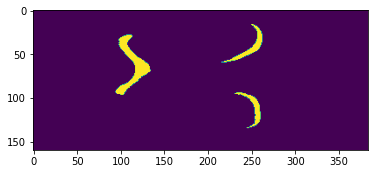

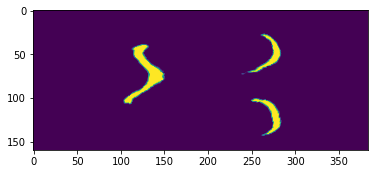

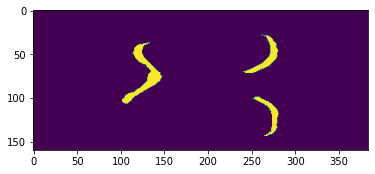

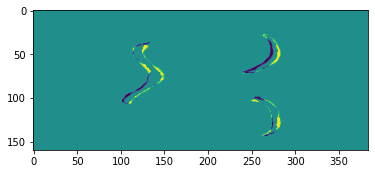

In [252]:
N =1
plt.imshow(moving_cartilage[N, 0, :, S * 4].cpu())
plt.show() 
plt.imshow(warped_moving_cartilage[N, 0, :, S * 4].detach().cpu())
plt.show()

plt.imshow(fixed_cartilage[N, 0, :, S * 4].cpu())
plt.show()

plt.imshow(warped_moving_cartilage[N, 0, :, S * 4].detach().cpu() - fixed_cartilage[N, 0, :, S * 4].cpu())
plt.show()

In [24]:

dices = []
for _ in range(70):
    fixed_image, fixed_cartilage = make_test_batch()
    moving_image, moving_cartilage = make_test_batch()
    net(moving_image, fixed_image)
    fat_phi = torch.nn.Upsample(size=moving_cartilage.size()[2:], mode="trilinear")(net.phi_AB[:, :3])
    sz = np.array(fat_phi.size())
    spacing = 1./(sz[2::]-1) 
    warped_moving_cartilage = compute_warped_image_multiNC(moving_cartilage.float(), fat_phi, spacing, 1)
    wmb = warped_moving_cartilage > .5
    fb = fixed_cartilage > .5
    intersection = wmb * fb
    d = 2 * torch.sum(intersection).float() / (torch.sum(wmb) + torch.sum(fb))
    print(d)
    dices.append(d)


torch.Size([3, 1, 40, 96, 96])
torch.Size([3, 1, 160, 384, 384])
torch.Size([3, 1, 40, 96, 96])
torch.Size([3, 1, 160, 384, 384])


/playpen-raid1/tgreer/anaconda3/envs/mermaid5/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


RuntimeError: Expected object of device type cuda but got device type cpu for argument #0 'result' in call to _th_bmm_out

In [21]:
np.mean([d.item() for d in dices])

0.6329520242554801

In [ ]:
import os
files = os.listdir("../results/aff_aff_def_knee_frozen_affine/")
files = [f for f in files if "_net" in f]


In [17]:
diceHistory = []
for f in files[-13:]:
    net.adjust_batch_size(BATCH_SIZE)
    net.load_state_dict(torch.load("../results/aff_aff_def_knee_frozen_affine/" + f))
    net.adjust_batch_size(BATCH_SIZE // 8)
    net.cuda()
    dices = []
    for _ in range(70):
        fixed_image, fixed_cartilage = make_test_batch()
        moving_image, moving_cartilage = make_test_batch()
        net(moving_image, fixed_image)
        fat_phi = torch.nn.Upsample(size=moving_cartilage.size()[2:], mode="trilinear")(net.phi_AB[:, :3])
        sz = np.array(fat_phi.size())
        spacing = 1./(sz[2::]-1) 
        warped_moving_cartilage = compute_warped_image_multiNC(moving_cartilage.float(), fat_phi, spacing, 1)
        wmb = warped_moving_cartilage > .5
        fb = fixed_cartilage > .5
        intersection = wmb * fb
        d = 2 * torch.sum(intersection).float() / (torch.sum(wmb) + torch.sum(fb))
        #print(d)
        dices.append(d)
    dd = np.mean([d.item() for d in dices])
    print(dd)
    diceHistory.append(dd)

/playpen-raid1/tgreer/anaconda3/envs/mermaid5/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=trilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


0.6318306139537266
0.6333377242088318
0.6529300161770412
0.642835384607315
0.660569076027189
0.6427910898412977
0.6423958148275103
0.639816844037601
0.6484852922814233
0.6478869795799256
0.6327998399734497
0.6459056309291294
0.6635956568377358


In [284]:
cartilage[0].int8

AttributeError: 'Tensor' object has no attribute 'int8'

In [286]:
cartilage[0].type(torch.ByteTensor)

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         ...,

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 

In [287]:
compressed_cart = [c.type(torch.ByteTensor) for c in cartilage]

In [289]:
torch.save(compressed_cart, "/playpen/tgreer/cartilage_uint8s.trch")

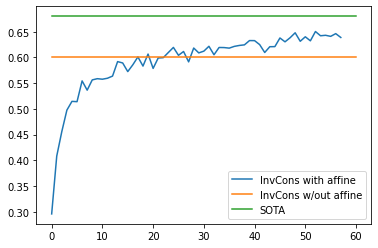

In [47]:
plt.plot(diceHistory, label="InvCons with affine")
plt.plot([0, 60], [.60, .60], label="InvCons w/out affine")
plt.plot([0, 60], [.68, .68], label="SOTA")
plt.legend()

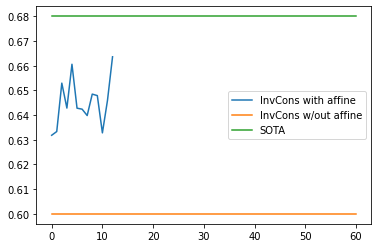

In [18]:
plt.plot(diceHistory, label="InvCons with affine")
plt.plot([0, 60], [.60, .60], label="InvCons w/out affine")
plt.plot([0, 60], [.68, .68], label="SOTA")
plt.legend()

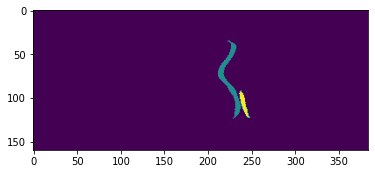

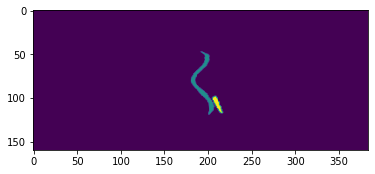

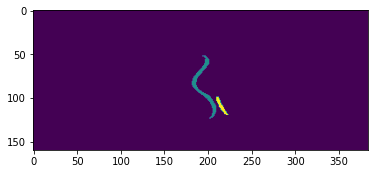

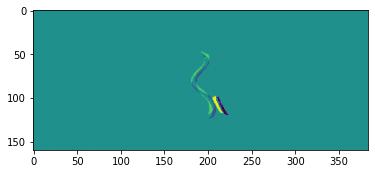

In [23]:
N =2
S = 40
plt.imshow(moving_cartilage[N, 0, :, :, S * 4].cpu())
plt.show() 
plt.imshow(warped_moving_cartilage[N, 0, :,:, S * 4].detach().cpu())
plt.show()

plt.imshow(fixed_cartilage[N, 0, :,:, S * 4].cpu())
plt.show()

plt.imshow(warped_moving_cartilage[N, 0, :,:, S * 4].detach().cpu() - fixed_cartilage[N, 0, :,:, S * 4].cpu())
plt.show()



In [24]:
def flips(phi):
    a = phi[:, :, 1:, 1:, 1:] - phi[:, :, :-1, 1:, 1:]
    b = phi[:, :, 1:, 1:, 1:] - phi[:, :, 1:, :-1, 1:]
    c = phi[:, :, 1:, 1:, 1:] - phi[:, :, 1:, 1:, :-1]

    dV = torch.sum(torch.cross(a, b, 1) * c, axis=1, keepdims=True)
    return torch.sum(dV < 0) / 3

In [25]:
flips(net.phi_AB[:, :3])

tensor(0., device='cuda:0')

In [ ]:
4